**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [90]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

# import data 2C_weka.csv for 2 Class Classifcation.


In [91]:
df = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

### Checking head andi tail of a data 

In [92]:
df.head()
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


### Find the missing value

In [93]:
print (df.isna().sum())
print ('No missing values is found ')
print ('Shape of dtataframe is = ' + str(df.shape))

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
No missing values is found 
Shape of dtataframe is = (310, 7)


### Look at the unique values of class values.

In [94]:
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

### Checking Data Types of data coloumn

In [95]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

###  Count  of class values

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


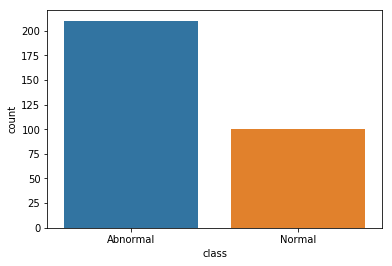

In [96]:
sns.countplot(df['class'])
df.groupby(["class"]).count()

### Five point summary of data

In [97]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


### Check for outliers

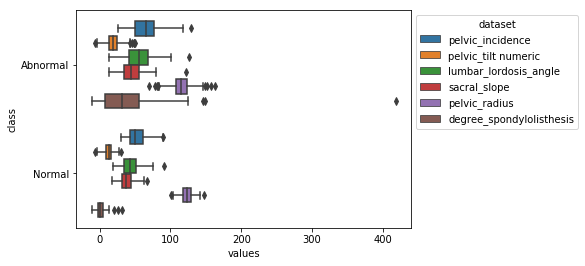

In [98]:
import matplotlib.pyplot as plt
data = df.melt(id_vars=['class'], var_name='dataset', value_name='values')
#print(data)

sns.boxplot(data=data, x='values', y='class', hue='dataset')
plt.legend(title='dataset', loc='upper left', bbox_to_anchor=(1, 1))

In [99]:
#sns.boxplot(df['pelvic_incidence']);

In [100]:
#sns.boxplot(df['pelvic_tilt numeric']);

In [101]:
#sns.boxplot(df['lumbar_lordosis_angle']);

In [102]:
#sns.boxplot(df['sacral_slope']);

In [103]:
#sns.boxplot(df['pelvic_radius']);

In [104]:
#sns.boxplot(df['degree_spondylolisthesis']);


### Look at the distribution of class values and other attributes. 

C:\Users\Parikshit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


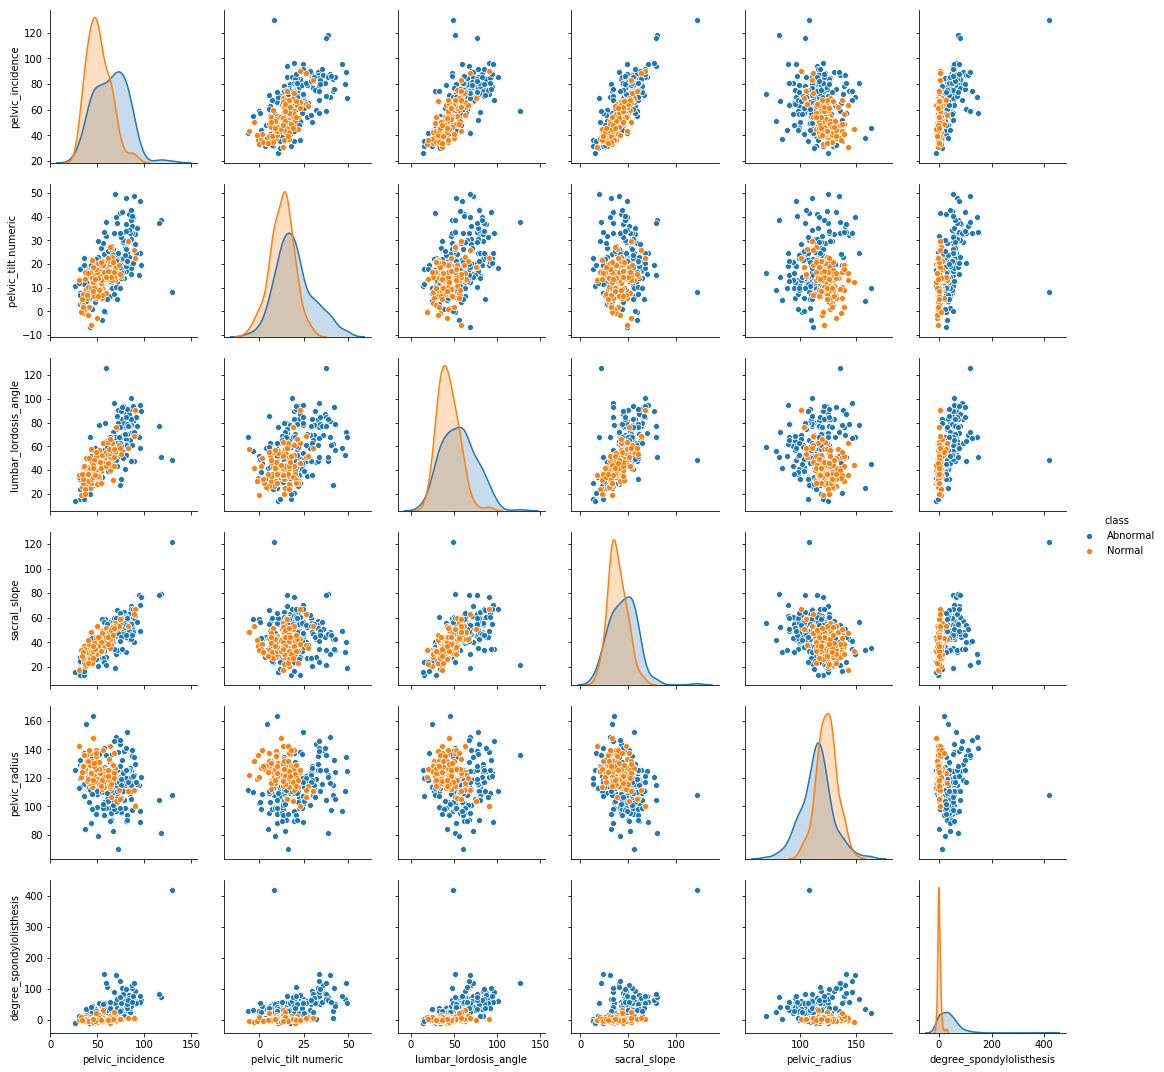

In [105]:
sns.pairplot(df,hue='class');

### Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization

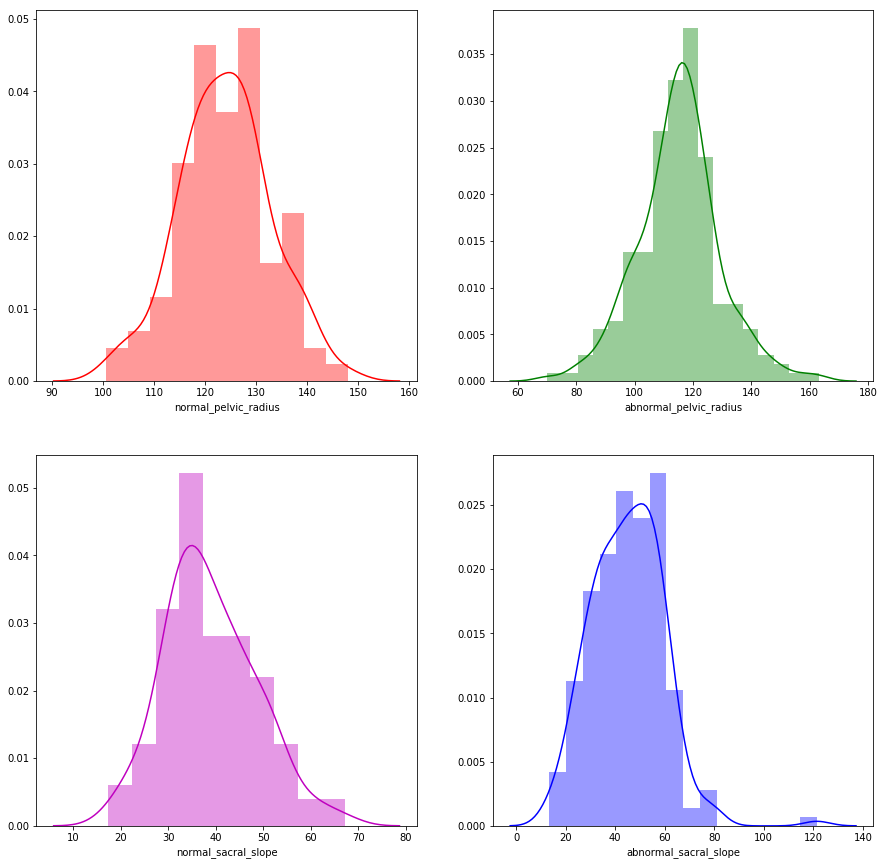

In [106]:
normal_pelvic_radius = df[df['class'] == 'Normal']['pelvic_radius']
abnormal_pelvic_radius = df[df['class'] == 'Abnormal']['pelvic_radius']
normal_sacral_slope = df[df['class'] == 'Normal']['sacral_slope']
abnormal_sacral_slope = df[df['class'] == 'Abnormal']['sacral_slope']
fig, axs = plt.subplots(figsize=(15,15), ncols=2, nrows=2)
sns.distplot(normal_pelvic_radius,ax=axs[0,0],axlabel='normal_pelvic_radius',color='r',norm_hist=False);
sns.distplot(abnormal_pelvic_radius,ax=axs[0,1],axlabel='abnormal_pelvic_radius',color='g',norm_hist=False);
sns.distplot(normal_sacral_slope,ax=axs[1,0],axlabel='normal_sacral_slope',color='m',norm_hist=False);
sns.distplot(abnormal_sacral_slope,ax=axs[1,1],axlabel='abnormal_sacral_slope',color='b',norm_hist=False);

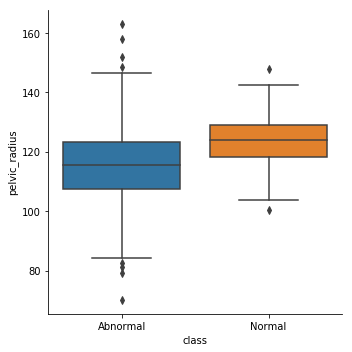

In [107]:
sns.catplot(x="class", y="pelvic_radius" ,kind="box", data=df);

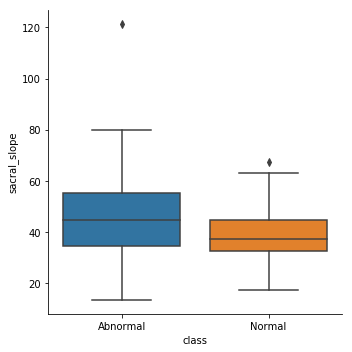

In [108]:
sns.catplot(x="class", y="sacral_slope" ,kind="box", data=df);

# Encode the Class variable to integer.

In [109]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() # label_encoder object is created 
# Encode labels in column 'Class'. 
 

In [110]:
df['class']= label_encoder.fit_transform(df['class']) 

df['class'].unique()


array([0, 1], dtype=int64)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [111]:
X = df.drop('class', axis = 1) # selecting the input variables or features

In [112]:
y = df['class'] # slecting target variable 

# Split the dat as train and test with a ratio of 70:30.

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)


# Normalize your Data (X) to get values between 0 to 1.

In [114]:
from sklearn.preprocessing import MinMaxScaler
sc1=MinMaxScaler()
sc1.fit(X_train)
Scale_X_train = sc1.transform(X_train)
Scale_X_test = sc1.transform(X_test)

In [115]:
print ("size of training set is " + str(Scale_X_train.shape))
print ("size of testing set is " + str(Scale_X_test.shape))

size of training set is (217, 6)
size of testing set is (93, 6)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [116]:
NNH = KNeighborsClassifier(n_neighbors= 18  )
NNH.fit(Scale_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

In [117]:
predicted_labels = NNH.predict(Scale_X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [118]:
score1 = NNH.score(Scale_X_test, y_test)

In [119]:
print(score1)

0.8172043010752689


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

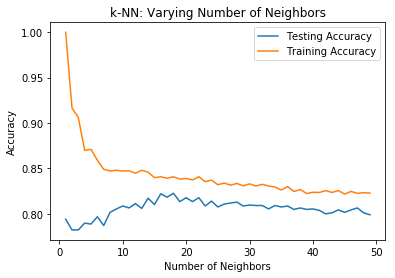

"\nerror=[]\n\nfor i in range (1,20):\n    NN  = KNeighborsClassifier( n_neighbors= i, weights = 'distance')\n    NN.fit(X_train, y_train)\n    predicted = NN.predict(X_test)\n    #test_pred = knn.predict(X_test)\n    #a = accuracy_score(y_test,predicted)\n    error.append(NN.score(X_test, y_test))\n    #list_k.append(i)\nprint(error)\n"

In [120]:
from matplotlib import pyplot as plt
neighbors = np.arange(1,50)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=MinMaxScaler()
        sc.fit(X_train)
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
"""
error=[]

for i in range (1,20):
    NN  = KNeighborsClassifier( n_neighbors= i, weights = 'distance')
    NN.fit(X_train, y_train)
    predicted = NN.predict(X_test)
    #test_pred = knn.predict(X_test)
    #a = accuracy_score(y_test,predicted)
    error.append(NN.score(X_test, y_test))
    #list_k.append(i)
print(error)
"""

In [121]:
print ('The best K value is 18 from the above graph')

The best K value is 18 from the above graph


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [122]:
df_3c = pd.read_csv('3Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

### Checking head and tail of a data 

In [123]:
df_3c.head()
df_3c.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


### Find the missing value

In [124]:
print (df_3c.isna().sum())
print ('No missing values is found ')

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
No missing values is found 


### Look at the unique values of class values.

In [125]:
df_3c['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

### Checking Data Types data 

In [126]:
df_3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


###  Count  of class values

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
class,,,,,,,
Hernia,60,60,60,60,60,60,60
Normal,100,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150,150


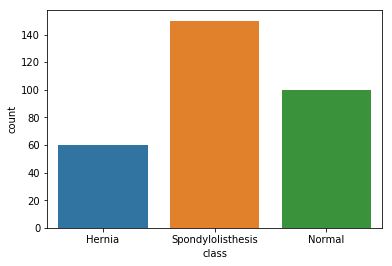

In [128]:
sns.countplot(df_3c['class'])
sns.countplot(df_3c['class'])
df.groupby(df_3c["class"]).count()

### Five point summary of data

In [129]:
df_3c.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


### checking for outlier

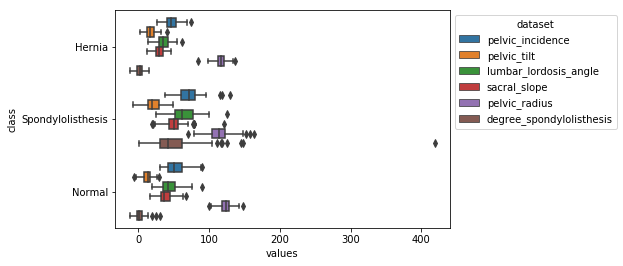

In [130]:
data = df_3c.melt(id_vars=['class'], var_name='dataset', value_name='values')
#print(data)

sns.boxplot(data=data, x='values', y='class', hue='dataset')
plt.legend(title='dataset', loc='upper left', bbox_to_anchor=(1, 1))

### Look at the distribution of class values and other attributes. 

C:\Users\Parikshit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


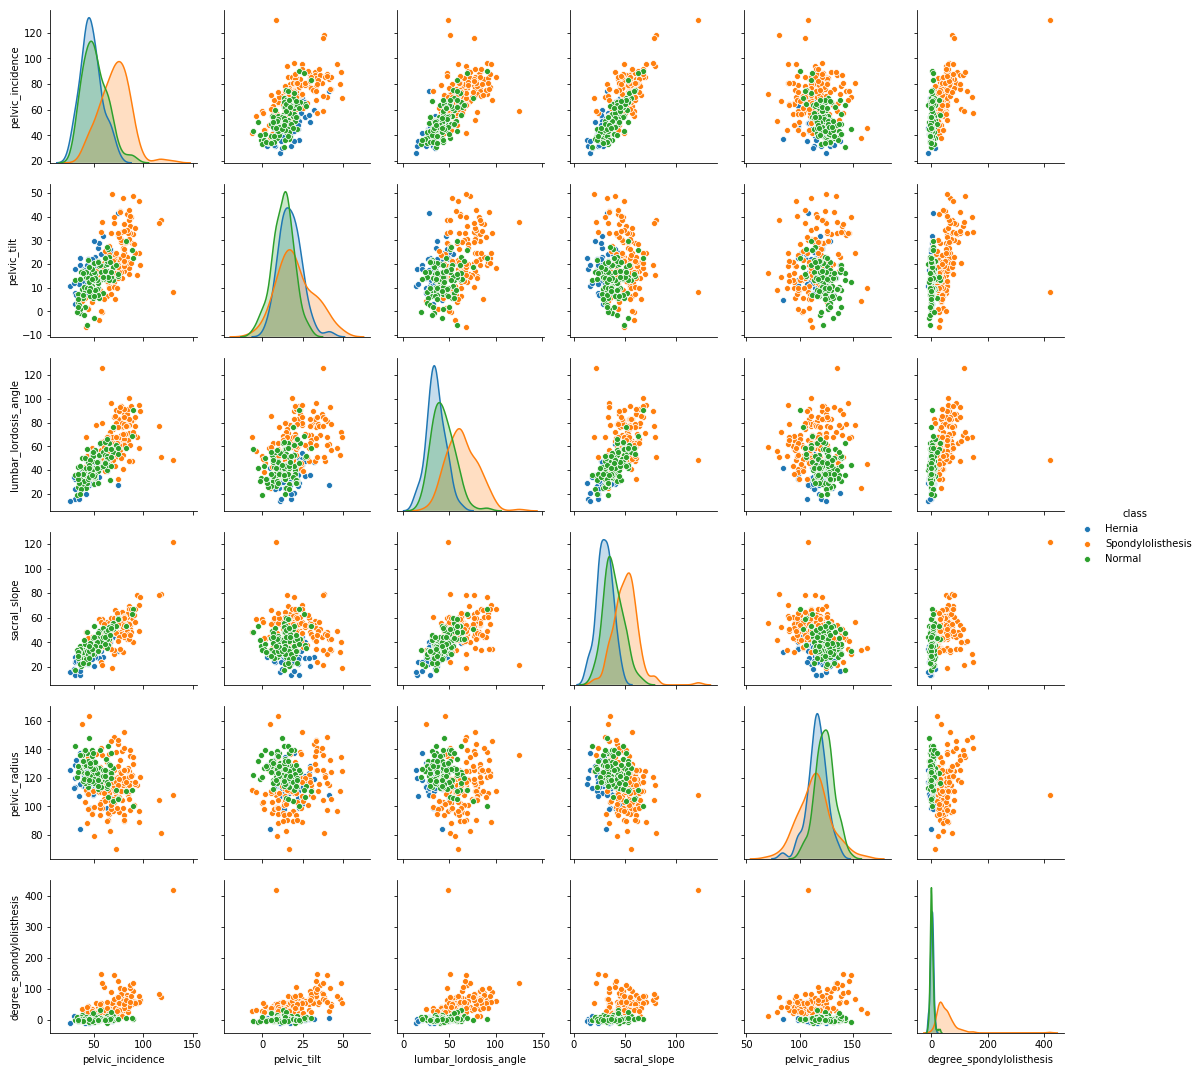

In [131]:
sns.pairplot(df_3c, hue= 'class')

### Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization

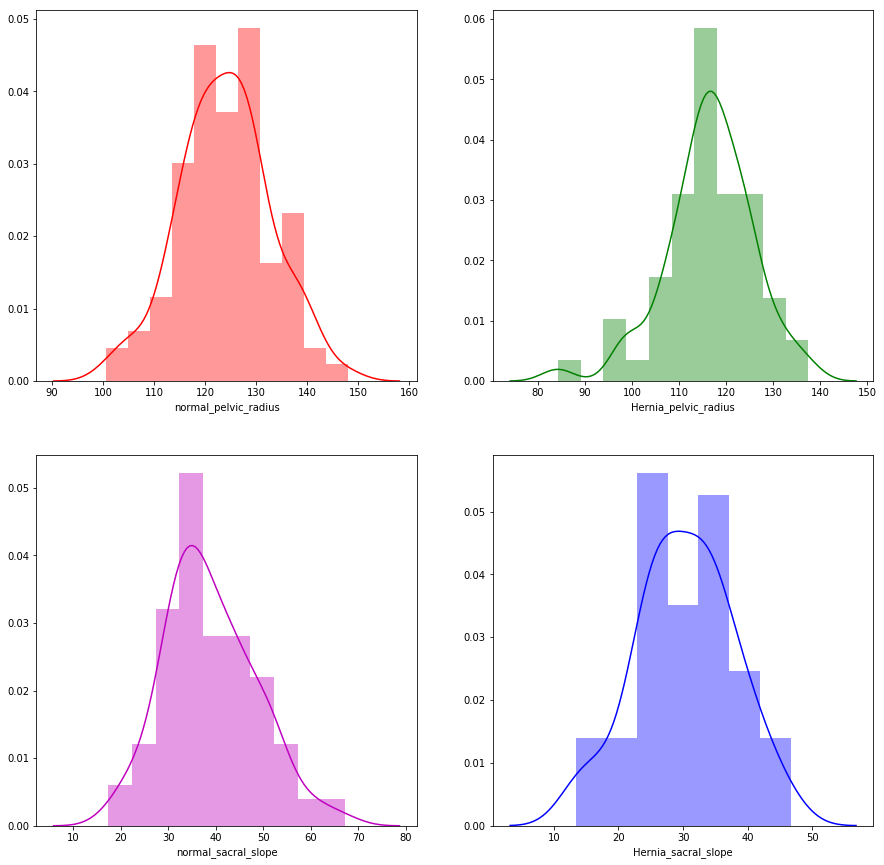

In [132]:
import matplotlib.pyplot as plt
normal_pelvic_radius = df_3c[df_3c['class'] == 'Normal']['pelvic_radius']
Hernia_pelvic_radius = df_3c[df_3c['class'] == 'Hernia']['pelvic_radius']
normal_sacral_slope = df_3c[df_3c['class'] == 'Normal']['sacral_slope']
Hernia_sacral_slope = df_3c[df_3c['class'] == 'Hernia']['sacral_slope']
Spondylolisthesis_sacral_slope = df_3c[df_3c['class'] == 'Spondylolisthesis']['sacral_slope']
Spondylolisthesis_pelvic_radius = df_3c[df_3c['class'] == 'Spondylolisthesis']['sacral_slope']
fig, axs = plt.subplots(figsize=(15,15), ncols=2, nrows=2)
sns.distplot(normal_pelvic_radius,ax=axs[0,0],axlabel='normal_pelvic_radius',color='r',norm_hist=False);
sns.distplot(Hernia_pelvic_radius,ax=axs[0,1],axlabel='Hernia_pelvic_radius',color='g',norm_hist=False);
sns.distplot(normal_sacral_slope,ax=axs[1,0],axlabel='normal_sacral_slope',color='m',norm_hist=False);
sns.distplot(Hernia_sacral_slope,ax=axs[1,1],axlabel='Hernia_sacral_slope',color='b',norm_hist=False);


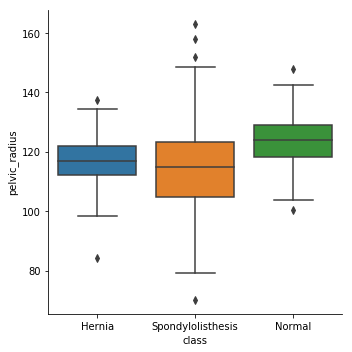

In [133]:
sns.catplot(x="class", y="pelvic_radius" ,kind="box", data=df_3c);

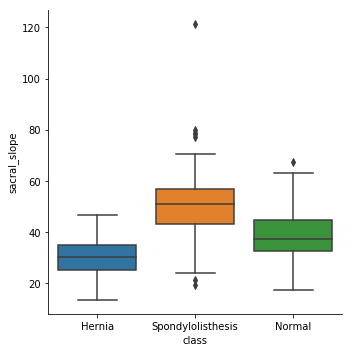

In [134]:
sns.catplot(x="class", y="sacral_slope" ,kind="box", data=df_3c);

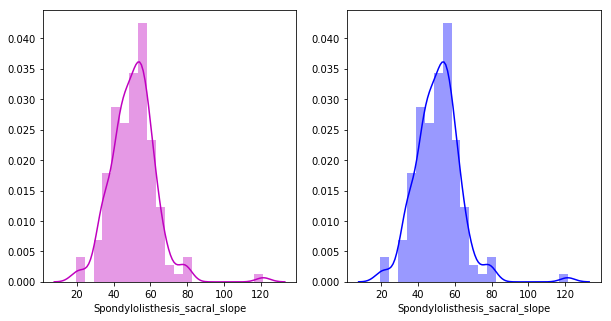

In [135]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
sns.distplot(Spondylolisthesis_sacral_slope,ax=axs[0],axlabel='Spondylolisthesis_sacral_slope',color='m',norm_hist=False);
sns.distplot(Spondylolisthesis_sacral_slope,ax=axs[1],axlabel='Spondylolisthesis_sacral_slope',color='b',norm_hist=False);

# Encode the Class variable to integer.

In [136]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() # label_encoder object is created 
# Encode labels in column 'Class'. 
 

In [137]:
df_3c['class']= label_encoder.fit_transform(df_3c['class']) 
df_3c.head()
df_3c['class'].unique()


array([0, 2, 1], dtype=int64)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [168]:
X = df_3c.drop('class', axis = 1) # selecting feartures 

In [169]:
y = df_3c['class'] # selecting target class 

# Split the dat as train and test with a ratio of 70:30.

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)


# Normalize your Data (X) to get values between 0 to 1.

In [171]:
from sklearn.preprocessing import MinMaxScaler
sc2=MinMaxScaler()
sc2.fit(X_train)
Scale_X_train = sc2.transform(X_train)
Scale_X_test = sc2.transform(X_test)

In [172]:
print ("size of training set is " + str(Scale_X_train.shape))
print ("size of testing set is " + str(Scale_X_test.shape))

size of training set is (217, 6)
size of testing set is (93, 6)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [177]:
NNH = KNeighborsClassifier(n_neighbors= 12 )
NNH.fit(Scale_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [178]:
predicted_labels = NNH.predict(Scale_X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [179]:
score2 = knn.score(Scale_X_test, y_test)

In [180]:
print(score2)

0.7419354838709677


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

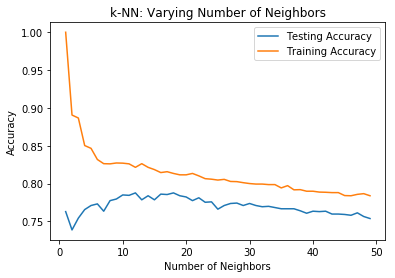

"\nerror_3c=[]\n\nfor i in range (1,20):\n    NN  = KNeighborsClassifier( n_neighbors= i , weights = 'distance')\n    NN.fit(X_train, y_train)\n    predicted = NN.predict(X_test)\n    #test_pred = knn.predict(X_test)\n    #a = accuracy_score(y_test,predicted)\n    error_3c.append(NN.score(X_test, y_test))\n    #list_k.append(i)\nprint(error_3c)\n"

In [147]:
from matplotlib import pyplot as plt
neighbors = np.arange(1,50)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=MinMaxScaler()
        sc.fit(X_train)
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
"""
error_3c=[]

for i in range (1,20):
    NN  = KNeighborsClassifier( n_neighbors= i , weights = 'distance')
    NN.fit(X_train, y_train)
    predicted = NN.predict(X_test)
    #test_pred = knn.predict(X_test)
    #a = accuracy_score(y_test,predicted)
    error_3c.append(NN.score(X_test, y_test))
    #list_k.append(i)
print(error_3c)
"""

In [148]:
print (' The best value for k is = 12 from the above graph')

 The best value for k is = 12 from the above graph
